<div>
<img src="figures/svtLogo.png"/>
</div>  

<center><h1>Mathematical Optimization for Engineers</h1></center>
<center><h2>Lab 7 - Interior point method</h2></center>

Let's consider the following linear optimization problem:

\begin{align*}
		\min_{x_1,x_2} x_1 + x_2 \\
		\mbox{s.t. } x_1 \geq -1 \\
								 x_2 \geq -1 \\
\end{align*}

<u>Task 1</u>: Sketch the feasible region for this problem and contour lines of the objective. Where is the optimal solution?

(-1.5, 1.0)

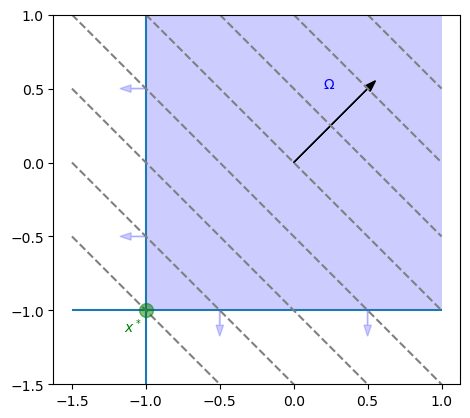

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

%matplotlib inline

x1 = np.linspace(-1.5,1,100)

objectives = [i-x1 for i in np.arange(-2, 4, 0.5)]

fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
plt.text(0.2, 0.5, r'$\Omega$', color='blue')

plt.hlines([-1], -1.5, 1)
plt.vlines([-1], -1.5, 1)
p = Polygon([[-1,-1], [-1, 1], [1, 1], [1, -1]], facecolor = 'blue', alpha=0.2)

ax.add_patch(p)

for obj in objectives:
    plt.plot(x1, obj, linestyle="--", color="gray")

plt.plot(-1, -1, marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green", alpha=0.5)
plt.text(-1.15, -1.15, r'$x^*$', color='green')

plt.arrow(0, 0, 0.5, 0.5, head_width = 0.05, width = 0.001, color="black", ec ='black')

plt.arrow(-0.5, -1, 0, -0.1, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(0.5, -1, 0, -0.1, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(-1, -0.5, -0.1, 0, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(-1, 0.5, -0.1, 0, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)

    
plt.ylim(-1.5, 1)

<u>Task 2</u>: Set up the Lagrangian function and write down the KKT-conditions.

$$
L(x_1, x_2,\lambda_1, \lambda_2) = (x_1+x_2)-\lambda_1(x_1+1)-\lambda_2(x_2+1)
$$
The KKT conditions are:
$$
\nabla L=\begin{bmatrix}1-\lambda_1 \\ 1-\lambda_2\end{bmatrix} = 0 \\
x_1+1 \geq 0 \\
x_2+1 \geq 0 \\
\lambda_1 \geq 0 \\
\lambda_2 \geq 0 \\
\lambda_1(x_1+1) = 0 \\
\lambda_2(x_2+1) = 0 \\
$$

<u>Task 3</u>: Transform the inequalities of the resulting nonlinear equation system into equalities by introducing slack variables.

The general idea of interior-point methods is to apply the Newton method (for root finding) to solve (approximated) KKT conditions.

\begin{align*}
		\min_{x_1,x_2} x_1 + x_2 \\
		\mbox{s.t. } x_1 + 1 - v_1 = 0 \\
					 x_2 + 1 - v_2 = 0 \\
					 v_1 = 0 \\
					 v_2 = 0 \\
\end{align*}


<u>Task 4</u>: Change the complementarity constraints by adding a parameter $\tau$ on the right hand side.

$\lambda_1(x_1+1) = \tau$

$\lambda_2(x_2+1) = \tau$

<u>Task 5</u>: Solve the nonlinear equation system analytically.

$$
\lambda_1 = 1, \lambda_2 = 1 \\
x_1 = \tau - 1 \\
x_2 = \tau - 1 \\
$$

<u>Task 6</u>: Sketch the central path in the domain of $x_1$ and $x_2$ for different values of $\tau$.

(-1.5, 1.0)

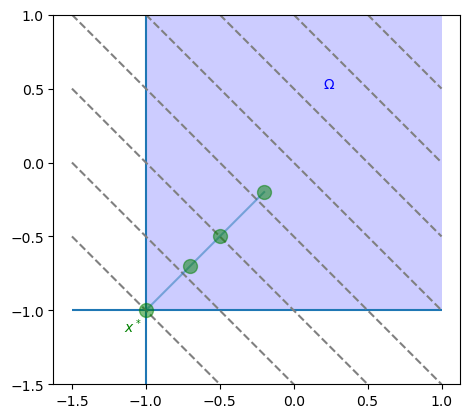

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

%matplotlib inline

x1 = np.linspace(-1.5,1,100)

objectives = [i-x1 for i in np.arange(-2, 4, 0.5)]

fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
plt.text(0.2, 0.5, r'$\Omega$', color='blue')

plt.hlines([-1], -1.5, 1)
plt.vlines([-1], -1.5, 1)
p = Polygon([[-1,-1], [-1, 1], [1, 1], [1, -1]], facecolor = 'blue', alpha=0.2)

ax.add_patch(p)

for obj in objectives:
    plt.plot(x1, obj, linestyle="--", color="gray")

plt.plot([-0.2, -0.5, -0.7, -1], [-0.2, -0.5, -0.7, -1], marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green", alpha=0.5)
plt.text(-1.15, -1.15, r'$x^*$', color='green')


    
plt.ylim(-1.5, 1)

<u>Task 7</u>: Sketch the feasible set of the complementarity constraints for different values of $\tau$.

(0.0, 3.0)

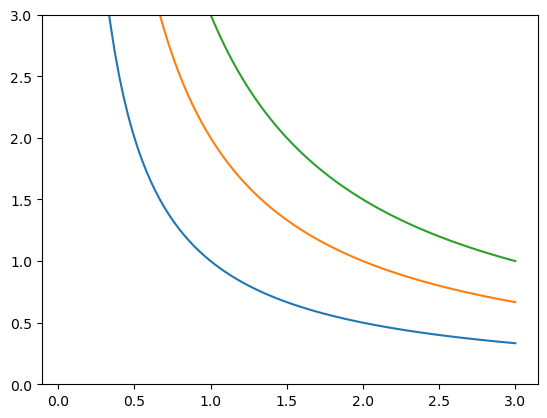

In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

s = np.linspace(0.04,3,100)

tau = [1,2,3]
lambda_values = [t/s for t in tau]

fig, ax = plt.subplots()

for l in lambda_values:
    plt.plot(s, l)
    
plt.ylim(0, 3)

<u>Task 8</u>: Write down the Newton step for solving the approximated KKT-conditions.

We will solve this system using Python below.

In [12]:
import sys
!{sys.executable} -m pip install autograd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=474fae265c89b6592295242510ba6ed2c159b119403abe9db77451e8b8d52267
  Stored in directory: /home/jovyan/.cache/pip/wheels/22/73/06/557dc4f4ef68179b9d763930d6eec26b88ed7c389b19588a1c
Successfully built future


In [13]:
import autograd
import autograd.numpy as np

# RHS of KKT system
# approximate KKT means the complementarity slackness condition is tau and not 0
def F(Z, tau):
    x1 = Z[0]
    x2 = Z[1]
    s1 = Z[2]
    s2 = Z[3]
    l1 = Z[4]
    l2 = Z[5]
    F = np.array([1-l1,
         1-l2,
         x1+1-s1,
         x2+1-s2,
         l1*(x1+1)-tau,
         l2*(x2+1)-tau
    ])
    return F

Typically, it is very difficult to find a strictly feasible initial point. Here, we are able to pick a random point because the problem is very small.

In [14]:
 def solve(tau):

    # initial point for original problem
    Z = np.ones(6)
    
    # initial guess for Newton's method
    deltaZ = np.ones(6)
    
    # convergence tolerance
    tol = 1e-5
    
    # f_prime
    jac = autograd.jacobian(F, 0)
    
    it=0
    # KKT conditions are a set of nonlinear equations we need to solve
    # F(x, slack, lambda) = 0 (for exact KKT)
    # Apply Newton's method to iterate to the solution. 
    # F(Z0) + Jacobian(Z0) * deltaZ = 0
    while np.linalg.norm(deltaZ) > tol:
        it=it+1
        
        f_prime = jac(Z,tau)
        f = F(Z,tau)

        # solve linear equation system
        deltaZ = np.linalg.solve(f_prime, -f)

        Z = Z + deltaZ
        
    return Z, it

In [15]:
# loop for different values of tau
tau = [1.0, 0.5, 0.25, 0.125, 1e-2, 1e-3, 1e-5]
print("{:<10} {:<20} {:^10}".format('tau','minimum','iter'))
for itau in tau:
    Zopt, it = solve(itau)
    print ("{:<10} [{:^8.4f}, {:^8.4f}] {:<4} {:<20d}".format(itau,Zopt[0],Zopt[1],' ',it))

tau        minimum                 iter   
1.0        [ 0.0000 ,  0.0000 ]      2                   
0.5        [-0.5000 , -0.5000 ]      2                   
0.25       [-0.7500 , -0.7500 ]      2                   
0.125      [-0.8750 , -0.8750 ]      2                   
0.01       [-0.9900 , -0.9900 ]      2                   
0.001      [-0.9990 , -0.9990 ]      2                   
1e-05      [-1.0000 , -1.0000 ]      2                   
